# Portfolio visualization in python 

In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np


## Fetching data from yahoo financial

In [2]:
tickers = "SPY AAPL MSFT GOOG TSLA NKE"
startdate = "2017-01-01"

data = yf.download(tickers=tickers, start=startdate)

[*********************100%***********************]  6 of 6 completed


<AxesSubplot:xlabel='Date'>

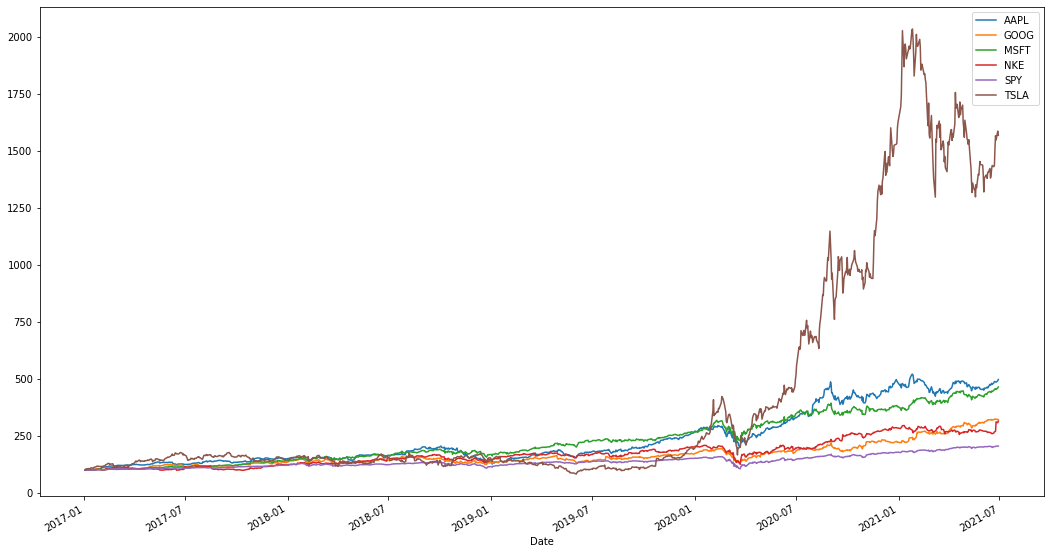

In [3]:
adjclose = data['Adj Close']

#normalize the adjusted closes to see the relative performance of each stock 

normprice = adjclose/adjclose.iloc[0]*100

normprice.plot(figsize=(18,10))

In [4]:
normprice.head()

,AAPL,GOOG,MSFT,NKE,SPY,TSLA
Date,,,,,,
2017-01-03,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2017-01-04,99.888078,100.096676,99.552552,102.096982,100.594937,104.608507
2017-01-05,100.396055,101.002367,99.552552,102.077722,100.515006,104.497902
2017-01-06,101.515289,102.545349,100.415457,103.712961,100.874612,105.539424
2017-01-09,102.445114,102.608951,100.095865,102.693352,100.541645,106.585561


In [5]:
returns = np.log(normprice/ normprice.shift(1))

#To get the average annualized returns using 252 trading days
returns.mean() *252

AAPL    0.358034
GOOG    0.260041
MSFT    0.342893
NKE     0.256070
SPY     0.160677
TSLA    0.614442
dtype: float64

In [6]:
returns.cov() * 252

,AAPL,GOOG,MSFT,NKE,SPY,TSLA
AAPL,0.097875,0.057941,0.065994,0.043319,0.047059,0.081765
GOOG,0.057941,0.076372,0.060995,0.038127,0.041889,0.064054
MSFT,0.065994,0.060995,0.079894,0.043139,0.046420,0.076285
NKE,0.043319,0.038127,0.043139,0.088127,0.038211,0.052694
SPY,0.047059,0.041889,0.046420,0.038211,0.038317,0.052786
TSLA,0.081765,0.064054,0.076285,0.052694,0.052786,0.377722


## stock class

In [7]:
apple = yf.Ticker('AAPL')
apple.info

{'zip': '95014',
 'sector': 'Technology',
 'fullTimeEmployees': 100000,
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, iPod touch, and other Apple-branded and third-party accessories. It also provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store, that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. In addition, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience with on-demand r

In [8]:
apple.history(period='1y')

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-06-30,89.417497,90.882631,89.397634,90.589600,140223200,0.0,0.0
2020-07-01,90.669063,91.225313,90.368590,90.418251,110737200,0.0,0.0
2020-07-02,91.346998,91.997613,90.301545,90.418251,114041600,0.0,0.0
2020-07-06,91.880900,93.316229,91.848617,92.836960,118655600,0.0,0.0
2020-07-07,93.224338,94.021465,92.434661,92.548889,112424400,0.0,0.0
...,...,...,...,...,...,...,...
2021-06-23,133.770004,134.320007,133.229996,133.699997,60214200,0.0,0.0
2021-06-24,134.449997,134.639999,132.929993,133.410004,68711000,0.0,0.0
2021-06-25,133.460007,133.889999,132.809998,133.110001,70730700,0.0,0.0


## stock visualization

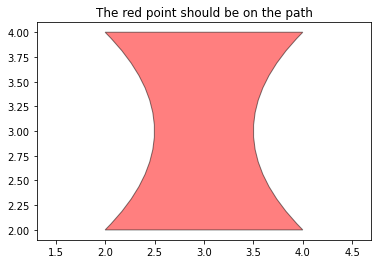

In [35]:
import matplotlib.path as mpath
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

Path = mpath.Path

fig, ax = plt.subplots()
pp1 = mpatches.PathPatch(
    Path([(2, 2), (3,3), (2, 4), (4, 4), (3,3), (4,2), (0,0)],
         [Path.MOVETO, Path.CURVE3, Path.CURVE3,Path.LINETO, Path.CURVE3, Path.CURVE3, Path.CLOSEPOLY]),
    facecolor='r', alpha=0.5, transform=ax.transData)

ax.add_patch(pp1)
ax.autoscale_view()
ax.axis('equal')
ax.set_title('lookbook')

plt.show()

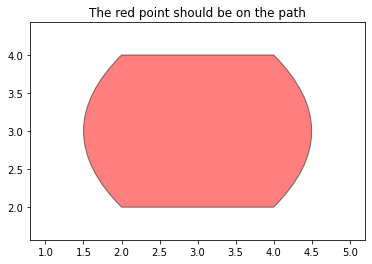

In [36]:
Path = mpath.Path

fig, ax = plt.subplots()
pp1 = mpatches.PathPatch(
    Path([(2, 2), (1,3), (2, 4), (4, 4), (5,3), (4,2), (0,0)],
         [Path.MOVETO, Path.CURVE3, Path.CURVE3,Path.LINETO, Path.CURVE3, Path.CURVE3, Path.CLOSEPOLY]),
    facecolor='r', alpha=0.5, transform=ax.transData)

ax.add_patch(pp1)
ax.autoscale_view()
ax.axis('equal')
ax.set_title('lookbook')

plt.show()

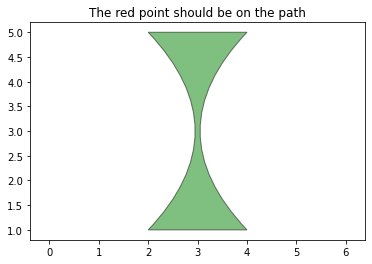

In [34]:
Path = mpath.Path

fig, ax = plt.subplots()
pp1 = mpatches.PathPatch(
    Path([(2, 1), (3.9,3), (2, 5), (4, 5), (2.1,3), (4,1), (0,0)],
         [Path.MOVETO, Path.CURVE3, Path.CURVE3,Path.LINETO, Path.CURVE3, Path.CURVE3, Path.CLOSEPOLY]),
    facecolor='g', alpha=0.5, transform=ax.transData)

ax.add_patch(pp1)
ax.axis('equal')
ax.autoscale_view()

plt.show()

In [ ]:
def drawPillar(history, benchmark, duration, ):
    Path = mpath.Path

    fig, ax = plt.subplots()
    pp1 = mpatches.PathPatch(
        Path([(2, 1), (3.9,3), (2, 5), (4, 5), (2.1,3), (4,1), (0,0)],
             [Path.MOVETO, Path.CURVE3, Path.CURVE3,Path.LINETO, Path.CURVE3, Path.CURVE3, Path.CLOSEPOLY]),
        facecolor='g', alpha=0.5, transform=ax.transData)

    ax.add_patch(pp1)
    ax.axis('equal')
    ax.autoscale_view()
    plt.show()


The following single line of code generates a random array of weights that sum to 1.0. In the portfolio, one of the assumptions is that all funds will deployed to the assets in the portfolio according to some weighting.

In [16]:
weights = np.random.dirichlet(np.ones(6), size=1)
weights = weights[0]
print(weights)

[0.1011222  0.27278289 0.04686733 0.22746161 0.1766948  0.17507117]


From these weights, we can calculate the expected weighted return of the portfolio of assets using these random weights.

In [17]:
exp_port_return = np.sum(returns.mean()*weights)*252
print('portfolio mean: ',exp_port_return)

portfolio mean:  0.30442577400581355


In [19]:
np.dot(returns.cov()*252, weights)

array([0.06262906, 0.0580804 , 0.05971997, 0.05310903, 0.04402291,
       0.11899557])

In [20]:
np.dot?

In [18]:
port_var = np.dot(weights.T, np.dot(returns.cov()*252, weights))
port_vol = np.sqrt(port_var)
print(port_var)
print('portfolio volatility: ', port_vol)

0.0656670218176016
portfolio volatility:  0.25625577421319035


In [44]:
import time

def portfolio_simulation(assets, startdate, iterations):
    '''
    Runs a simulation by randomly selecting portfolio weights a specified
    number of times (iterations), returns the list of results and plots 
    all the portfolios as well.
    
    Parameters:
    -----------  
        assets: list
            all the assets that are to be pulled from Quandl to comprise
            our portfolio.    
        iterations: int 
            the number of randomly generated portfolios to build.
    
    Returns:
    --------
        port_returns: array
            array of all the simulated portfolio returns.
        port_vols: array
            array of all the simulated portfolio volatilities.
    '''
    
    start = time.time()
    num_assets = len(assets.split())
    
    data = yf.download(tickers=assets, start=startdate)
    acp = data['Adj Close']
    returns = np.log(acp/acp.shift(1))
    
    port_returns = []
    port_volats = []
    
    for i in range(iterations):
        weights = np.random.dirichlet(np.ones(num_assets), size=1)
        weights = weights[0]
        port_returns.append(np.sum(returns.mean()*weights) * 252)
        port_volats.append(np.sqrt(np.dot(weights.T, np.dot(returns.cov()*252, weights))))
        
    port_returns = np.array(port_returns)
    port_volats = np.array(port_volats)
    
    plt.figure(figsize=(18,10))
    plt.scatter(port_volats, port_returns, c=port_returns/port_volats, marker='o')
    plt.xlabel('Portfolio Volatility')
    plt.ylabel('Portfolio Return')
    plt.colorbar(label = 'Sharpe ratio')
    
    print('Elapsed Time: {} seconds'.format(time.time() - start))
    
    return port_returns, port_volats
    

    

[*********************100%***********************]  5 of 5 completed
Elapsed Time: 5.1137590408325195 seconds


(array([0.12614127, 0.15060265, 0.15732232, ..., 0.1921303 , 0.15762868,
        0.14168524]),
 array([0.20244938, 0.22242152, 0.21513029, ..., 0.22986326, 0.21900324,
        0.2322779 ]))

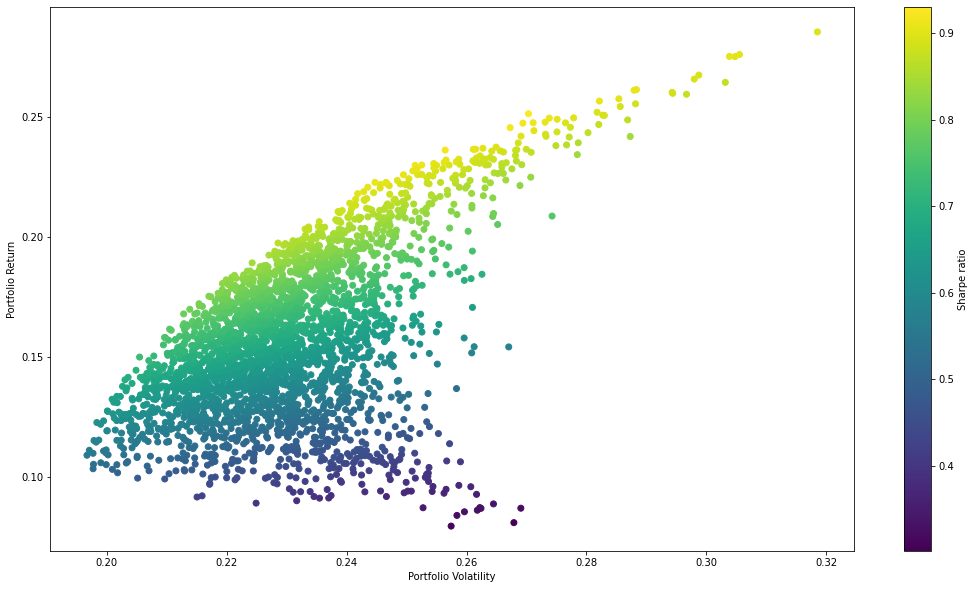

In [51]:
assets = "SPY AAPL MSFT NKE VWO"
startdate = "2005-01-01"

[*********************100%***********************]  5 of 5 completed
Elapsed Time: 8.665001153945923 seconds


(array([0.16497848, 0.22043563, 0.11721253, ..., 0.13672873, 0.14048205,
        0.10262904]),
 array([0.22695679, 0.25483346, 0.22987248, ..., 0.24003743, 0.22476205,
        0.23009112]))

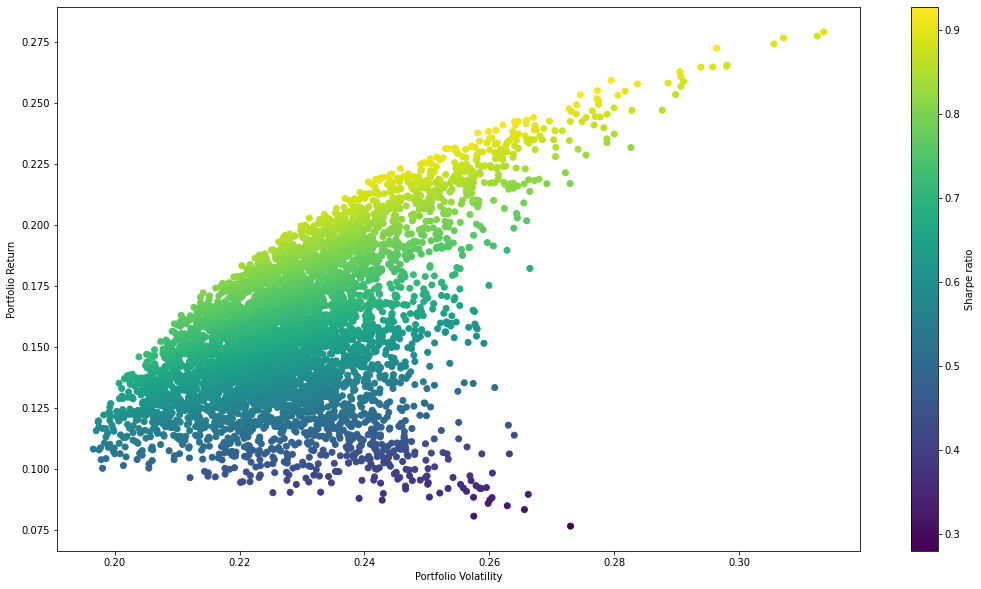

In [52]:
portfolio_simulation(assets, startdate, 5000)

In [50]:
def portfolio_stats(weights, returns):
    
    weights = np.array(weights)
    port_return = np.sum(returns.mean()*weights)*252
    port_volat = np.sqrt(np.dot(weights.T, np.dot(returns.cov()*252, weights)))
    sharpe = port_return/port_volat
    
    return {'return': port_return, 'volatility':port_volat, 'sharpe':sharpe}

In [ ]:
# Using plotly.express
import plotly.express as px

fig = px.line(adjclose)

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)

fig.show()

In [ ]:
df = px.data.stocks(indexed=True) - 1
fig = px.area(df, facet_col="company", facet_col_wrap=3)
fig.show()

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv')

fig = px.line(df, x='Date', y='AAPL.High', title='Time Series with Range Slider and Selectors')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

## references

https://kevinvecmanis.io/finance/optimization/2019/04/02/Algorithmic-Portfolio-Optimization.html